In [7]:
import networkx as nx
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

In [8]:
nx.pagerank(g)

{0: 0.01321914850756847,
 1: 0.04305614905051307,
 2: 0.0224184422385673,
 3: 0.020763573555365067,
 4: 0.1519409000092644,
 5: 0.015278038556628357,
 6: 0.04357199076624549,
 7: 0.08868962006965002,
 8: 0.009276594051426114,
 9: 0.027215223573378695,
 10: 0.009276594051426114,
 11: 0.009276594051426114,
 12: 0.009276594051426114,
 13: 0.021104257419853185,
 14: 0.023535500084085954,
 15: 0.009276594051426114,
 16: 0.018135203917936826,
 17: 0.009276594051426114,
 18: 0.01264966891920012,
 19: 0.05375946044542632,
 20: 0.009276594051426114,
 21: 0.011904963688854351,
 22: 0.15057445865003966,
 23: 0.02084377195458973,
 24: 0.025679331302227965,
 25: 0.02721686924658904,
 26: 0.0925438315518033,
 27: 0.009276594051426114,
 28: 0.009276594051426114,
 29: 0.03241025002937753}

In [19]:
import random as rd
import numpy as np

def pagerank(n):
    #creating empty lists where we will save numbers of tmes the surfer visisted each page
    lists = [[] for _ in range(30)]
    #chooosing a random node
    node = rd.choice(list(g.nodes))
    #updating # of times this node was visited
    lists[node].append(1)
    for i in range(n):
        if rd.uniform(0,1) < 0.85:
            #if there is at least one neighbor, go to a random neighbr
            if len(list(g.neighbors(node))) > 0:
                node = rd.choice(list(g.neighbors(node)))
                lists[node].append(1)
            else:
                #if not, choose a random node
                node = rd.choice(list(g.nodes))
                lists[node].append(1)
        else:
            #choosing a random node
            node = rd.choice(list(g.nodes))
            lists[node].append(1)
        
    for i in range(len(lists)):
        #normalizing page ranks
        lists[i] = np.sum(lists[i])/n
    return lists

In [44]:
#computing average errors for different numbers of iterations
ns = []
errors = []
for i in range(100,10100,200):
    ns.append(i)
    a = pagerank(i)
    error = 0
    for k in range(30):
        error += abs(a[k]-nx.pagerank(g)[k])
    errors.append(error/30)

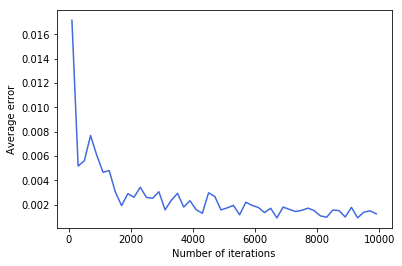

In [49]:
import matplotlib.pyplot as plt
plt.plot(ns, errors, color='royalblue')
plt.xlabel('Number of iterations')
plt.ylabel('Average error')
plt.show()
